# Testing Tensorflow-probability

https://www.tensorflow.org/probability/

In [1]:
from __future__ import print_function

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

tfe = tf.contrib.eager
tfe.enable_eager_execution()

import matplotlib.pyplot as plt

## Following Tensorflow Distributions

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/TensorFlow_Distributions_Tutorial.ipynb

Univariate normal

In [2]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal/' batch_shape=() event_shape=() dtype=float32>

In [3]:
n.sample(10)

<tf.Tensor: id=24, shape=(10,), dtype=float32, numpy=
array([-1.746722  ,  0.5355255 , -0.34402657, -1.196651  ,  0.88183194,
        0.4527351 ,  0.95411116,  0.45735818, -1.5992491 ,  0.734688  ],
      dtype=float32)>

In [4]:
n.log_prob(2.)

<tf.Tensor: id=36, shape=(), dtype=float32, numpy=-2.9189386>

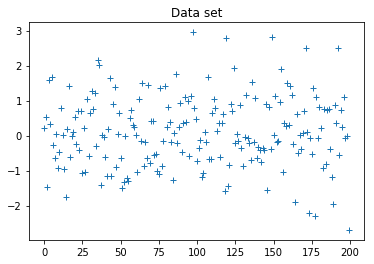

In [5]:
data = n.sample(200)
plt.plot(data.numpy(), '+')
plt.title("Data set")
plt.show()

Bernoulli

In [6]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=() event_shape=() dtype=int32>

In [7]:
b.sample()

<tf.Tensor: id=89, shape=(), dtype=int32, numpy=0>

Multivariate probability

In [8]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag/' batch_shape=() event_shape=(2,) dtype=float32>

In [9]:
nd.sample()

<tf.Tensor: id=212, shape=(2,), dtype=float32, numpy=array([-0.8920782,  8.600561 ], dtype=float32)>

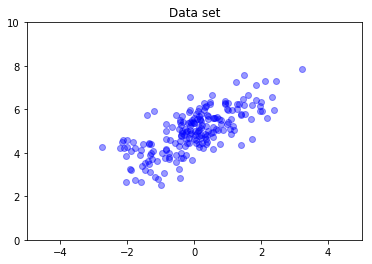

In [10]:
nd = tfd.MultivariateNormalFullCovariance(
    loc = [0., 5], covariance_matrix = [[1., .7], [.7, 1.]])
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

3 Bernoullis

In [11]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=(3,) event_shape=() dtype=int32>

In [12]:
b3.sample(5)

<tf.Tensor: id=412, shape=(5, 3), dtype=int32, numpy=
array([[0, 1, 0],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1]])>

In [13]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli/' batch_shape=() event_shape=(3,) dtype=int32>

In [14]:
b3.prob([1, 1, 0])

<tf.Tensor: id=432, shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

In [15]:
b3_joint.prob([1, 1, 0])

<tf.Tensor: id=450, shape=(), dtype=float32, numpy=0.044999998>

3 multivariate distributions

In [16]:
nd_batch = tfd.MultivariateNormalFullCovariance(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    covariance_matrix = [[[1., .1], [.1, 1.]], 
                         [[1., .3], [.3, 1.]],
                         [[1., .5], [.5, 1.]]])
nd_batch

<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=(3,) event_shape=(2,) dtype=float32>

We see batch_shape = (3,), so there are three independent multivariate normals, and event_shape =  (2,), so each multivariate normal is two-dimensional. In this example, the individual distributions do not have independent elements.

In [17]:
nd_batch.sample(4)

<tf.Tensor: id=590, shape=(4, 3, 2), dtype=float32, numpy=
array([[[-2.1315594 , -0.3206106 ],
        [ 1.3316823 ,  0.92885804],
        [ 1.1671957 ,  1.7396102 ]],

       [[ 0.18727984, -1.6002576 ],
        [ 1.8582368 , -1.3257644 ],
        [ 2.0739272 ,  1.9264214 ]],

       [[ 0.5875861 , -0.23210153],
        [-0.02034616,  0.30962515],
        [ 1.8364947 ,  1.071204  ]],

       [[-0.68502283,  0.06211077],
        [ 1.9553044 ,  1.1529217 ],
        [ 3.1749754 ,  1.961359  ]]], dtype=float32)>

## Understanding TensorFlow Distribution Shapes

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb

There are three important concepts associated with TensorFlow Distributions shapes:

* _Event shape_ describes the shape of a single draw from the distribution; it may be dependent across dimensions. For scalar distributions, the event shape is []. For a 5-dimensional MultivariateNormal, the event shape is [5].
* _Batch shape_ describes independent, not identically distributed draws, aka a "batch" of distributions.
* _Sample shape_ describes independent, identically distributed draws of batches from the distribution family.

The event shape and the batch shape are properties of a Distribution object, whereas the sample shape is associated with a specific call to sample or log_prob.

In [18]:
def describe_distributions(distributions):
    print('\n'.join([str(d) for d in distributions]))

In [19]:
poisson_distributions = [
    tfd.Poisson(rate=1., name='One Poisson Scalar Batch'),
    tfd.Poisson(rate=[1., 10., 100.], name='Three Poissons'),
    tfd.Poisson(rate=[[1., 10., 100.,], [2., 20., 200.]],
                name='Two-by-Three Poissons'),
    tfd.Poisson(rate=[1.], name='One Poisson Vector Batch'),
    tfd.Poisson(rate=[[1.]], name='One Poisson Expanded Batch')
]

describe_distributions(poisson_distributions)

tfp.distributions.Poisson("One Poisson Scalar Batch/", batch_shape=(), event_shape=(), dtype=float32)
tfp.distributions.Poisson("Three Poissons/", batch_shape=(3,), event_shape=(), dtype=float32)
tfp.distributions.Poisson("Two-by-Three Poissons/", batch_shape=(2, 3), event_shape=(), dtype=float32)
tfp.distributions.Poisson("One Poisson Vector Batch/", batch_shape=(1,), event_shape=(), dtype=float32)
tfp.distributions.Poisson("One Poisson Expanded Batch/", batch_shape=(1, 1), event_shape=(), dtype=float32)


In [20]:
normal_distributions = [
    tfd.Normal(loc=0., scale=1., name='Standard'),
    tfd.Normal(loc=[0.], scale=1., name='Standard Vector Batch'),
    tfd.Normal(loc=[0., 1., 2., 3.], scale=1., name='Different Locs'),
    tfd.Normal(loc=[0., 1., 2., 3.], scale=[[1.], [5.]],
               name='Broadcasting Scale')
]

describe_distributions(normal_distributions)

tfp.distributions.Normal("Standard/", batch_shape=(), event_shape=(), dtype=float32)
tfp.distributions.Normal("Standard Vector Batch/", batch_shape=(1,), event_shape=(), dtype=float32)
tfp.distributions.Normal("Different Locs/", batch_shape=(4,), event_shape=(), dtype=float32)
tfp.distributions.Normal("Broadcasting Scale/", batch_shape=(2, 4), event_shape=(), dtype=float32)


The basic rule is that when we sample from a distribution, the resulting Tensor has shape [sample_shape, batch_shape, event_shape], where batch_shape and event_shape are provided by the Distribution object, and sample_shape is provided by the call to sample. For scalar distributions, event_shape = [], so the Tensor returned from sample will have shape [sample_shape, batch_shape]. Let's try it:

In [21]:
def describe_sample_tensor_shape(sample_shape, distribution):
    print('Sample shape:', sample_shape)
    print('Returned sample tensor shape:',
          distribution.sample(sample_shape).shape)

def describe_sample_tensor_shapes(distributions, sample_shapes):
    started = False
    for distribution in distributions:
        print(distribution)
        for sample_shape in sample_shapes:
            describe_sample_tensor_shape(sample_shape, distribution)
        print()

sample_shapes = [1, 2, [1, 5], [3, 4, 5]]
describe_sample_tensor_shapes(poisson_distributions, sample_shapes)

tfp.distributions.Poisson("One Poisson Scalar Batch/", batch_shape=(), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1,)
Sample shape: 2
Returned sample tensor shape: (2,)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5)

tfp.distributions.Poisson("Three Poissons/", batch_shape=(3,), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1, 3)
Sample shape: 2
Returned sample tensor shape: (2, 3)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5, 3)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5, 3)

tfp.distributions.Poisson("Two-by-Three Poissons/", batch_shape=(2, 3), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1, 2, 3)
Sample shape: 2
Returned sample tensor shape: (2, 2, 3)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5, 2, 3)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5, 2

In [22]:
describe_sample_tensor_shapes(normal_distributions, sample_shapes)

tfp.distributions.Normal("Standard/", batch_shape=(), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1,)
Sample shape: 2
Returned sample tensor shape: (2,)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5)

tfp.distributions.Normal("Standard Vector Batch/", batch_shape=(1,), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1, 1)
Sample shape: 2
Returned sample tensor shape: (2, 1)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5, 1)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5, 1)

tfp.distributions.Normal("Different Locs/", batch_shape=(4,), event_shape=(), dtype=float32)
Sample shape: 1
Returned sample tensor shape: (1, 4)
Sample shape: 2
Returned sample tensor shape: (2, 4)
Sample shape: [1, 5]
Returned sample tensor shape: (1, 5, 4)
Sample shape: [3, 4, 5]
Returned sample tensor shape: (3, 4, 5, 4)

tfp.distributions.Normal("B

Now let's take a look at log_prob, which is somewhat trickier. log_prob takes as input a (non-empty) tensor representing the location(s) at which to compute the log_prob for the distribution. In the most straightforward case, this tensor will have a shape of the form [sample_shape, batch_shape, event_shape], where batch_shape and event_shape match the batch and event shapes of the distribution. Recall once more that for scalar distributions, event_shape = [], so the input tensor has shape [sample_shape, batch_shape] In this case, we get back a tensor of shape [sample_shape, batch_shape]:

In [23]:
three_poissons = tfd.Poisson(rate=[1., 10., 100.], name='Three Poissons')
three_poissons

<tfp.distributions.Poisson 'Three Poissons/' batch_shape=(3,) event_shape=() dtype=float32>

In [24]:
three_poissons.prob([[1., 10., 100.], [100., 10., 1]])

<tf.Tensor: id=1263, shape=(2, 3), dtype=float32, numpy=
array([[3.6787945e-01, 1.2511013e-01, 3.9861232e-02],
       [0.0000000e+00, 1.2511013e-01, 3.7204474e-42]], dtype=float32)>

In [25]:
three_poissons.log_prob([[1., 10., 100.], [100., 10., 1]])  # sample_shape is [2].

<tf.Tensor: id=1280, shape=(2, 3), dtype=float32, numpy=
array([[  -1.       ,   -2.0785608,   -3.222351 ],
       [-364.73938  ,   -2.0785608,  -95.39483  ]], dtype=float32)>